In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Dataset

In [2]:
train = pd.read_csv('train.csv', index_col='PassengerId')
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv',index_col='PassengerId')
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# check the Null in Data

In [4]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

# Prepocessing

## Filling null data

### Age

In [6]:
Sex_Age = train.groupby('Sex')['Age'].mean()
Sex_Age

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [7]:
train['Age_fill'] = train['Age']

train.loc[(train['Age'].isnull()) & (train['Sex'] == 'male'),'Age_fill'] = Sex_Age[1]
train.loc[(train['Age'].isnull()) & (train['Sex'] == 'female'),'Age_fill'] = Sex_Age[0]
train["Age_blank"] = train["Age"].isnull()

train[['Age_fill','Age_blank']].isnull().sum()

Age_fill     0
Age_blank    0
dtype: int64

In [8]:
test_Sex_Age = test.groupby('Sex')['Age'].mean()
test_Sex_Age

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

In [9]:
test['Age_fill'] = test['Age']

test.loc[(test['Age'].isnull()) & (test['Sex'] == 'male'),'Age_fill'] = Sex_Age[1]
test.loc[(test['Age'].isnull()) & (test['Sex'] == 'female'),'Age_fill'] = Sex_Age[0]
test["Age_blank"] = test["Age"].isnull()
test[['Age_fill','Age_blank']].isnull().sum()

Age_fill     0
Age_blank    0
dtype: int64

### Fare

In [10]:
# test 파일의 Fare 결측치를 0으로 채우겠습니다.

test['Fare'].fillna(0, inplace=True)
test['Fare'].isnull().sum()

0

### Embarked

In [11]:
# train 파일의 Embarked 결측치 채우기

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# 'S' 빈도가 압도적이어서 결측치 두 개를 'S'로 채우겠습니다.

train['Embarked'].fillna('S', inplace=True)
train['Embarked'].isnull().sum()

0

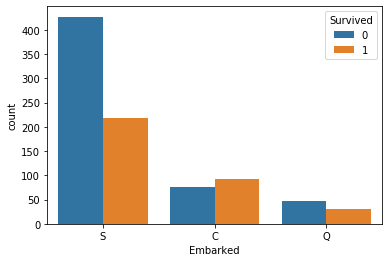

In [13]:
# 'Embarked_C' 에서 생존율이 높았습니다.

sns.countplot(data=train, x='Embarked', hue='Survived')

## Encoding Data

### Name

In [14]:
# Name 컬럼의 호칭을 뽑아내겠습니다.
train['Title'] = train['Name'].str.extract('([A-Za-z]*)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Don           1
Sir           1
Mme           1
Capt          1
Lady          1
Ms            1
Countess      1
Name: Title, dtype: int64

In [15]:
# 호칭 빈도가 10 미만인 것은 Other 리스트에 넣겠습니다.

title = list(train['Title'])
Other = []
for i in title:
    if title.count(i) < 10:
        Other.append(i)

In [16]:
# 의미가 비슷한 것은 합치고, 기타 호칭은 Other 로 칭하겠습니다.

for i in title:
    train['Title'] = train['Title'].replace('Mlle','Miss')
    train['Title'] = train['Title'].replace('Ms','Miss')
    train['Title'] = train['Title'].replace('Mme','Mrs')
    train['Title'] = train['Title'].replace(Other,'Other')
train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

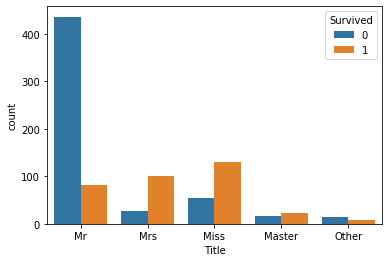

In [17]:
# Master도 생존율이 사망자에 비해 높긴 했지만, Mrs, Miss가 생존율이 훨씬 높았습니다.

sns.countplot(data=train, x='Title', hue='Survived')

In [18]:
# Mrs, Miss을 기준으로 title_m2 컬럼을 생성하겠습니다.

train['Title_m2'] = (train['Title'] == 'Mrs') | (train['Title'] == 'Miss')

In [19]:
# test에서도 위와 같은 과정을 반복하겠습니다.

test['Title'] = test['Name'].str.extract('([A-Za-z]*)\.')
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [20]:
test['Title'] = test['Title'].replace('Ms','Miss')
test['Title'] = test['Title'].replace('Col','Other') 
test['Title'] = test['Title'].replace('Rev','Other') 
test['Title'] = test['Title'].replace('Dona','Other') 
test['Title'] = test['Title'].replace('Dr','Other') 
test['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

In [21]:
test['Title_m2'] = (test['Title'] == 'Miss') | (test['Title'] == 'Mrs')

### Sex

In [22]:
train['Sex_encode'] = train['Sex'].replace('male',0).replace('female',1)

train[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [23]:
test['Sex_encode'] = test['Sex'].replace('male',0).replace('female',1)

test[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


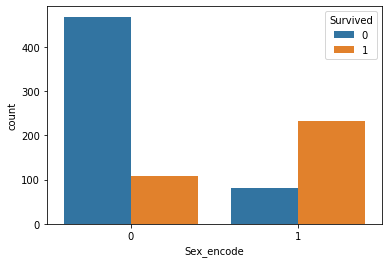

In [24]:
# 여성이 생존을 많이 하는 것으로 나타났습니다.

sns.countplot(data=train, x='Sex_encode', hue='Survived')

### Age

In [25]:
# Age_fill컬럼을 Young(~ 15세), Medium(16~29세), Old(30세~)으로 구분하겠습니다.

train.loc[train['Age'] < 15, 'Age_new'] = 'Young'
train.loc[(train['Age'] >= 15) & (train['Age'] < 30), 'Age_new'] = 'Medium'
train.loc[train['Age'] >= 30, 'Age_new'] = 'Old'
train['Age_blank'] = train['Age_new'].isnull()

train[['Age', 'Age_new','Age_blank']]

,Age,Age_new,Age_blank
PassengerId,,,
1,22.0,Medium,False
2,38.0,Old,False
3,26.0,Medium,False
4,35.0,Old,False
5,35.0,Old,False
...,...,...,...
887,27.0,Medium,False
888,19.0,Medium,False
889,NaN,NaN,True


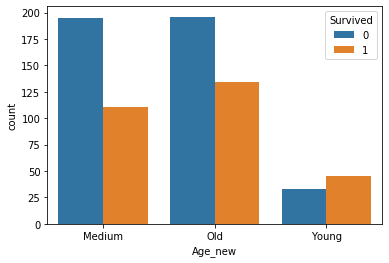

In [26]:
# Old 조건과 Young 조건에서 생존률이 상대적으로 높음을 알 수 있다.

sns.countplot(data=train, x='Age_new', hue='Survived')

In [27]:
test['Age'].value_counts().head(30)

24.0    17
21.0    17
22.0    16
30.0    15
18.0    13
27.0    12
26.0    12
25.0    11
23.0    11
29.0    10
36.0     9
45.0     9
20.0     8
17.0     7
28.0     7
32.0     6
31.0     6
55.0     6
33.0     6
39.0     6
35.0     5
41.0     5
47.0     5
40.0     5
50.0     5
42.0     5
48.0     5
19.0     4
43.0     4
1.0      3
Name: Age, dtype: int64

In [28]:
# test 파일에도 위와 같은 과정을 반복하겠습니다.

test.loc[test['Age'] < 15, 'Age_new'] = 'Young'
test.loc[(test['Age'] >= 15) & (test['Age'] < 30), 'Age_new'] = 'Medium'
test.loc[test['Age'] >= 30, 'Age_new'] = 'Old'
test['Age_blank'] = test['Age_new'].isnull()

test[['Age', 'Age_new','Age_blank']]

,Age,Age_new,Age_blank
PassengerId,,,
892,34.5,Old,False
893,47.0,Old,False
894,62.0,Old,False
895,27.0,Medium,False
896,22.0,Medium,False
...,...,...,...
1305,NaN,NaN,True
1306,39.0,Old,False
1307,38.5,Old,False


In [29]:
# Age_new의 데이터를 One Hot encoding 하겠습니다.

train['Age_Y'] = train['Age_new'] == 'Young'
train['Age_M'] = train['Age_new'] == 'Medium'
train['Age_O'] = train['Age_new'] == 'Old'

print(train.shape)
train[['Age_new','Age_Y','Age_M','Age_O']].head()

(891, 20)


,Age_new,Age_Y,Age_M,Age_O
PassengerId,,,,
1,Medium,False,True,False
2,Old,False,False,True
3,Medium,False,True,False
4,Old,False,False,True
5,Old,False,False,True


In [30]:
# test 파일에도 FamilyType의 데이터를 One Hot encoding 하겠습니다.

test['Age_Y'] = test['Age_new'] == 'Young'
test['Age_M'] = test['Age_new'] == 'Medium'
test['Age_O'] = test['Age_new'] == 'Old'

print(test.shape)
test[['Age_new','Age_Y','Age_M','Age_O']].head()

(418, 19)


,Age_new,Age_Y,Age_M,Age_O
PassengerId,,,,
892,Old,False,False,True
893,Old,False,False,True
894,Old,False,False,True
895,Medium,False,True,False
896,Medium,False,True,False


### Family

### FamilySize

In [31]:
# 먼저 SibSp + Parch + 1 을 하여 FamilySize 컬럼을 생성하겠습니다. 
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

print(train.shape)
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 21)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


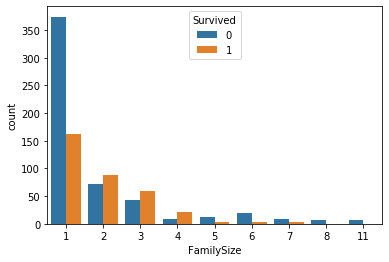

In [32]:
# 2명 ~ 4명이하인 경우에 생존율이 높은 것으로 나타났습니다.

sns.countplot(data=train, x='FamilySize', hue='Survived')

In [33]:
# test 파일에도 FamilySize 컬럼을 생성하겠습니다. 
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

print(test.shape)
test.head()

(418, 20)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill,Age_blank,Title,Title_m2,Sex_encode,Age_new,Age_Y,Age_M,Age_O,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,False,Mr,False,0,Old,False,False,True,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,False,Mrs,True,1,Old,False,False,True,2
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,False,Mr,False,0,Old,False,False,True,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,False,Mr,False,0,Medium,False,True,False,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,False,Mrs,True,1,Medium,False,True,False,3


### FamilyType

In [34]:
# FamilySize를 기초로 FamilyType 컬럼을 생성하겠습니다.

train.loc[train['FamilySize'] == 1, 'FamilyType'] = 'Single'
train.loc[(train['FamilySize'] >= 2) & (train['FamilySize'] < 5), 'FamilyType'] = 'Nuclear'
train.loc[train['FamilySize'] >= 5, 'FamilyType'] = 'Big'

print(train.shape)
train[['FamilySize','FamilyType']].head()

(891, 22)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single


In [35]:
# test 파일에도 FamilyType 컬럼을 생성하겠습니다. 

test.loc[test['FamilySize'] == 1, 'FamilyType'] = 'Single'
test.loc[(test['FamilySize'] >= 2) & (test['FamilySize'] < 5), 'FamilyType'] = 'Nuclear'
test.loc[test['FamilySize'] >= 5, 'FamilyType'] = 'Big'

print(test.shape)
test[['FamilySize','FamilyType']].head()

(418, 21)


,FamilySize,FamilyType
PassengerId,,
892,1,Single
893,2,Nuclear
894,1,Single
895,1,Single
896,3,Nuclear


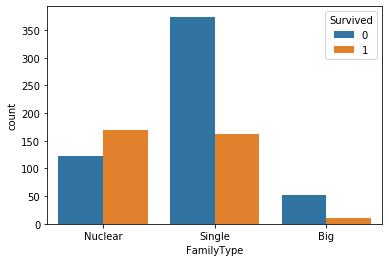

In [36]:
# 2~4인 가족 생존율이 높았습니다.

sns.countplot(data=train, x='FamilyType', hue='Survived')

In [37]:
# FamilyType의 데이터는 문자형이므로 분석에 활용할 수 있게 One Hot encoding 하겠습니다.

train['FamilyType_S'] = train['FamilyType'] == 'Single'
train['FamilyType_N'] = train['FamilyType'] == 'Nuclear'
train['FamilyType_B'] = train['FamilyType'] == 'Big'

print(train.shape)
train[['FamilyType','FamilyType_S','FamilyType_N','FamilyType_B']].head()

(891, 25)


,FamilyType,FamilyType_S,FamilyType_N,FamilyType_B
PassengerId,,,,
1,Nuclear,False,True,False
2,Nuclear,False,True,False
3,Single,True,False,False
4,Nuclear,False,True,False
5,Single,True,False,False


In [38]:
# test 파일에도 FamilyType의 데이터를 One Hot encoding 하겠습니다.

test['FamilyType_S'] = test['FamilyType'] == 'Single'
test['FamilyType_N'] = test['FamilyType'] == 'Nuclear'
test['FamilyType_B'] = test['FamilyType'] == 'Big'

print(test.shape)
test[['FamilyType','FamilyType_S','FamilyType_N','FamilyType_B']].head()

(418, 24)


,FamilyType,FamilyType_S,FamilyType_N,FamilyType_B
PassengerId,,,,
892,Single,True,False,False
893,Nuclear,False,True,False
894,Single,True,False,False
895,Single,True,False,False
896,Nuclear,False,True,False


### Embarked (One Hot Encoding)

In [39]:
# Embarked 컬럼의 데이터를 이용하여 One Hot Encoding을 실시하겠습니다.

train['Embarked_raw'] = train['Embarked']
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
print(train.shape)
train.head()

(891, 28)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_O,FamilySize,FamilyType,FamilyType_S,FamilyType_N,FamilyType_B,Embarked_raw,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,2,Nuclear,False,True,False,S,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,True,2,Nuclear,False,True,False,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,1,Single,True,False,False,S,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,True,2,Nuclear,False,True,False,S,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,True,1,Single,True,False,False,S,0,0,1


In [40]:
# test 파일에도 Embarked 컬럼을 One Hot Encoding 하겠습니다.

test['Embarked_raw'] = test['Embarked']
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')
print(test.shape)
test.head()

(418, 27)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_fill,...,Age_O,FamilySize,FamilyType,FamilyType_S,FamilyType_N,FamilyType_B,Embarked_raw,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,34.5,...,True,1,Single,True,False,False,Q,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,47.0,...,True,2,Nuclear,False,True,False,S,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,62.0,...,True,1,Single,True,False,False,Q,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,27.0,...,False,1,Single,True,False,False,S,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,22.0,...,False,3,Nuclear,False,True,False,S,0,0,1


## train

In [41]:
# Name 컬럼을 전처리할 때, Mrs와 Miss에서만 생존율이 높아 Mrs와 Miss 는 True, 나머지는 False로 놓고 Title_m2 컬럼을 생성해
# 학습시켰는데 오히려 예측률이 더 떨어져 전처리는 했지만 최종 학습에서는 빼고 분석했습니다.
# 혹시 제가 한 전처리 방법에 문제가 있어 예측률이 더 떨어진건지 봐주시면 감사하겠습니다ㅠㅠ

feature_names=['Sex_encode','Pclass','Fare', 'FamilyType_S','FamilyType_N','FamilyType_B','Embarked_C','Embarked_Q','Embarked_S',
              'Age_O','Age_Y','Age_M']
feature_names

['Sex_encode',
 'Pclass',
 'Fare',
 'FamilyType_S',
 'FamilyType_N',
 'FamilyType_B',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Age_O',
 'Age_Y',
 'Age_M']

In [42]:
x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(891, 12)


,Sex_encode,Pclass,Fare,FamilyType_S,FamilyType_N,FamilyType_B,Embarked_C,Embarked_Q,Embarked_S,Age_O,Age_Y,Age_M
PassengerId,,,,,,,,,,,,
1,0,3,7.2500,False,True,False,0,0,1,False,False,True
2,1,1,71.2833,False,True,False,1,0,0,True,False,False
3,1,3,7.9250,True,False,False,0,0,1,False,False,True
4,1,1,53.1000,False,True,False,0,0,1,True,False,False
5,0,3,8.0500,True,False,False,0,0,1,True,False,False


In [43]:
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(418, 12)


,Sex_encode,Pclass,Fare,FamilyType_S,FamilyType_N,FamilyType_B,Embarked_C,Embarked_Q,Embarked_S,Age_O,Age_Y,Age_M
PassengerId,,,,,,,,,,,,
892,0,3,7.8292,True,False,False,0,1,0,True,False,False
893,1,3,7.0000,False,True,False,0,0,1,True,False,False
894,0,2,9.6875,True,False,False,0,1,0,True,False,False
895,0,3,8.6625,True,False,False,0,0,1,False,False,True
896,1,3,12.2875,False,True,False,0,0,1,False,False,True


In [44]:
label_name='Survived'
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Use Decision Tree

**Gini Impurity(지니 불순도) : 어떤 조건이 좋은 조건인지, 그렇지 않은 조건인지를 알 수 있다. 지니 불순도가 낮을수록 좋은 조건이므로, 이 조건을 트리의 상위에 놓으면 된다. (좋은 조건 : 0, 안 좋은 조건 : 0.5)**

* Gini Impurity 가 가장 낮은 조건을 최상위 트리에 둔다.

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 10)
# max_depth = 10 : .78947 , max_depth = 15 : .78708
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
prediction = model.predict(x_test)
print(prediction.shape)
prediction

(418,)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### submit

In [48]:
submit = pd.read_csv('gender_submission.csv', index_col='PassengerId')
submit['Survived'] = prediction
submit

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [49]:
submit.to_csv('decision_tree_0712.csv')